# **Customer Segmentation**

This case requires to develop a customer segmentation to understand customers behavior and sepparate them in different groups or cluster according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from scipy import stats
from scipy.stats import norm, skew
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [7]:
# load dataset
customer_df = pd.read_csv("Mall_Customers.csv")

In [8]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
customer_df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
customer_df.shape

(200, 5)

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
customer_df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [13]:
customer_dtype = customer_df.dtypes
customer_dtype.value_counts()

int64     4
object    1
dtype: int64

In [14]:
customer_df.isnull().sum().head()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

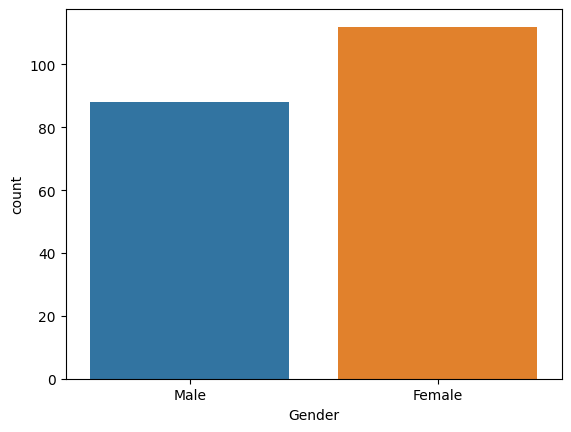

In [15]:
sns.countplot(x='Gender', data = customer_df)

<Axes: xlabel='Age', ylabel='Count'>

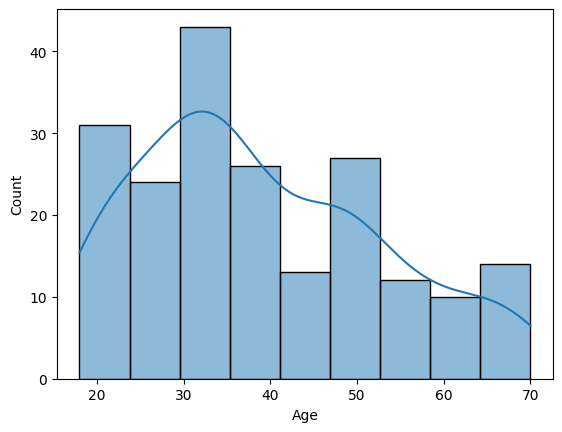

In [43]:
sns.histplot(data=customer_df, x = 'Age', kde=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

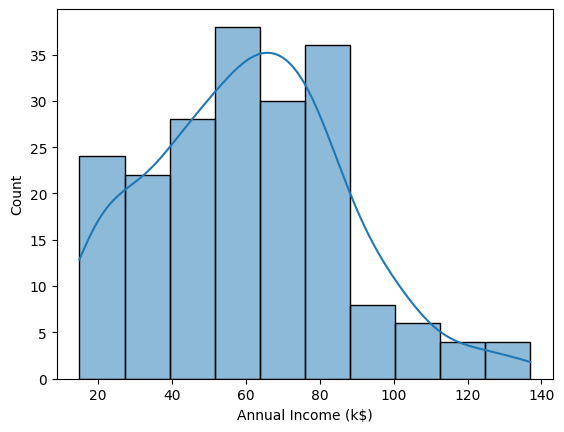

In [39]:
sns.histplot(data=customer_df, x = 'Annual Income (k$)',kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

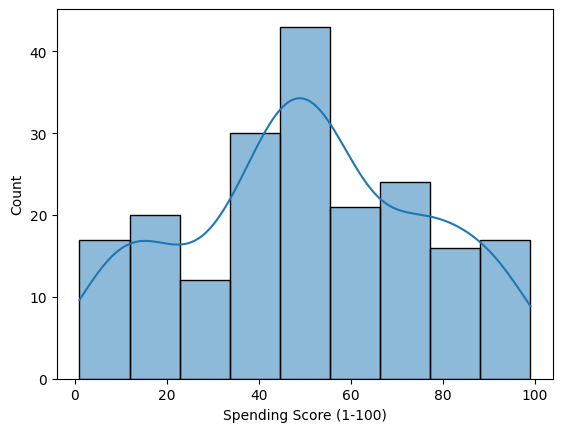

In [38]:
sns.histplot(data=customer_df, x = 'Spending Score (1-100)',kde=True)

In [19]:
#Drop Columns
customer_df.drop(columns = 'CustomerID', axis = 1, inplace=True)

In [20]:
customer_df = pd.get_dummies(customer_df).reset_index(drop = True)

## Model Development

### To find the best K value
**Elbow Method:** The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values.

In [ ]:
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(customer_df))
  inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

rom the above elbow method we see that **K = 5** is the best K value for our clustering

### K-Means Clustering

In [54]:
kmeans_model = KMeans(n_clusters=5, n_init=10)
kmeans_clusters = kmeans_model.fit_predict(customer_df)

### Agglomerative Clustering

In [55]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(customer_df)

### GaussianMixture Model

In [56]:
GaussianMixture_model = GaussianMixture(n_components=5)
gmm_clusters = GaussianMixture_model.fit_predict(customer_df)

### DBSCAN Clustering

In [57]:
model_dbscan = DBSCAN(eps=3, min_samples=17)
dbscan_clusters = model_dbscan.fit_predict(customer_df)

To compare which clustering algorithm is best for our model, we use Silhouette Score

In [58]:
def silhouette_method(df,algo,y_pred):
  print('===============================================================================')
  print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(customer_df,' : KMeans',kmeans_clusters)
silhouette_method(customer_df,' : Agglomerative',agglomerative_clusters)
silhouette_method(customer_df,' : GaussianMixture',gmm_clusters)
print('===============================================================================')

Clustering   : KMeans  : silhouette score :  0.44507599607710707
Clustering   : Agglomerative  : silhouette score :  0.44014934458740124
Clustering   : GaussianMixture  : silhouette score :  0.44433420850948174


From the above analysis,we saw that "K-Means" algorithm has high silhouette score as compared to others

### Cluster Visualization

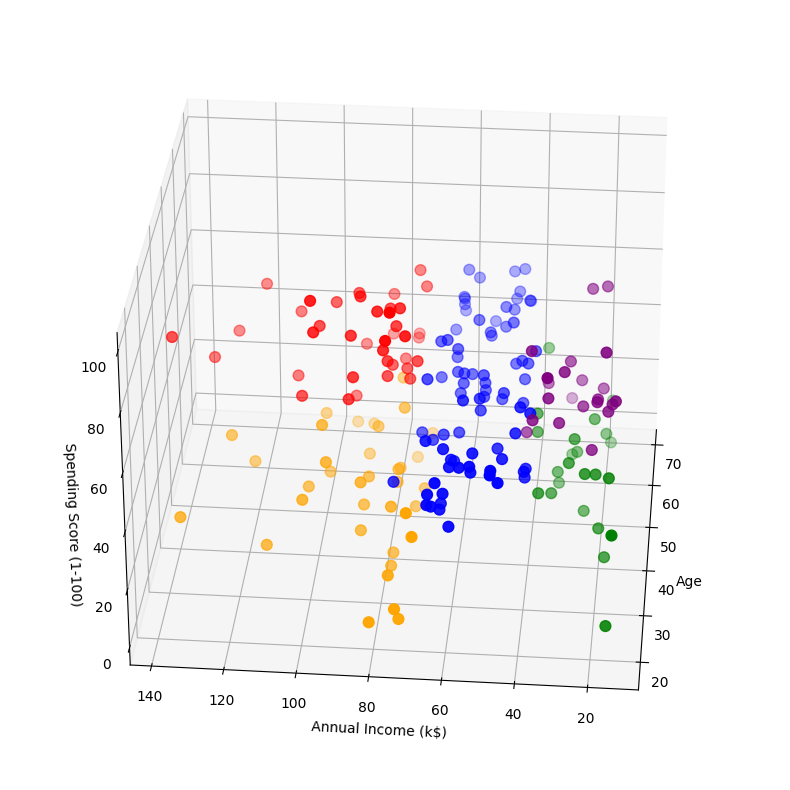

In [60]:
from mpl_toolkits.mplot3d import Axes3D

customer_df["label"] = kmeans_clusters

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_df.Age[customer_df.label == 0], customer_df["Annual Income (k$)"][customer_df.label == 0], customer_df["Spending Score (1-100)"][customer_df.label == 0], c='blue', s=60)
ax.scatter(customer_df.Age[customer_df.label == 1], customer_df["Annual Income (k$)"][customer_df.label == 1], customer_df["Spending Score (1-100)"][customer_df.label == 1], c='red', s=60)
ax.scatter(customer_df.Age[customer_df.label == 2], customer_df["Annual Income (k$)"][customer_df.label == 2], customer_df["Spending Score (1-100)"][customer_df.label == 2], c='green', s=60)
ax.scatter(customer_df.Age[customer_df.label == 3], customer_df["Annual Income (k$)"][customer_df.label == 3], customer_df["Spending Score (1-100)"][customer_df.label == 3], c='orange', s=60)
ax.scatter(customer_df.Age[customer_df.label == 4], customer_df["Annual Income (k$)"][customer_df.label == 4], customer_df["Spending Score (1-100)"][customer_df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()